In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Temporary/creditcard.csv",header = 0)
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# No Null column, so no data cleanup required

In [ ]:
# Checking Target imbalance
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Fraud percentage
100*data[(data.Class == 1)].Class.count()/data.Class.count()

0.1727485630620034

# Fraud Percentage is very low: .17%

In [ ]:
# As data is highly imbalanced, we will keep 10% of data as hold out and perform Train Test split on next 90%  of the data
X = data.drop('Class', axis = 1)
y = data.Class
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y,test_size = 0.10)

# Checking Imbalance nature in Train and holdout data
print('Imbalance Nature in Train dataset', 100* y_train.sum()/y_train.count())

print('Imbalance Nature in Holdout dataset', 100* y_holdout.sum()/y_holdout.count())

Imbalance Nature in Train dataset 0.17243666268735908
Imbalance Nature in Holdout dataset 0.1755556335802816


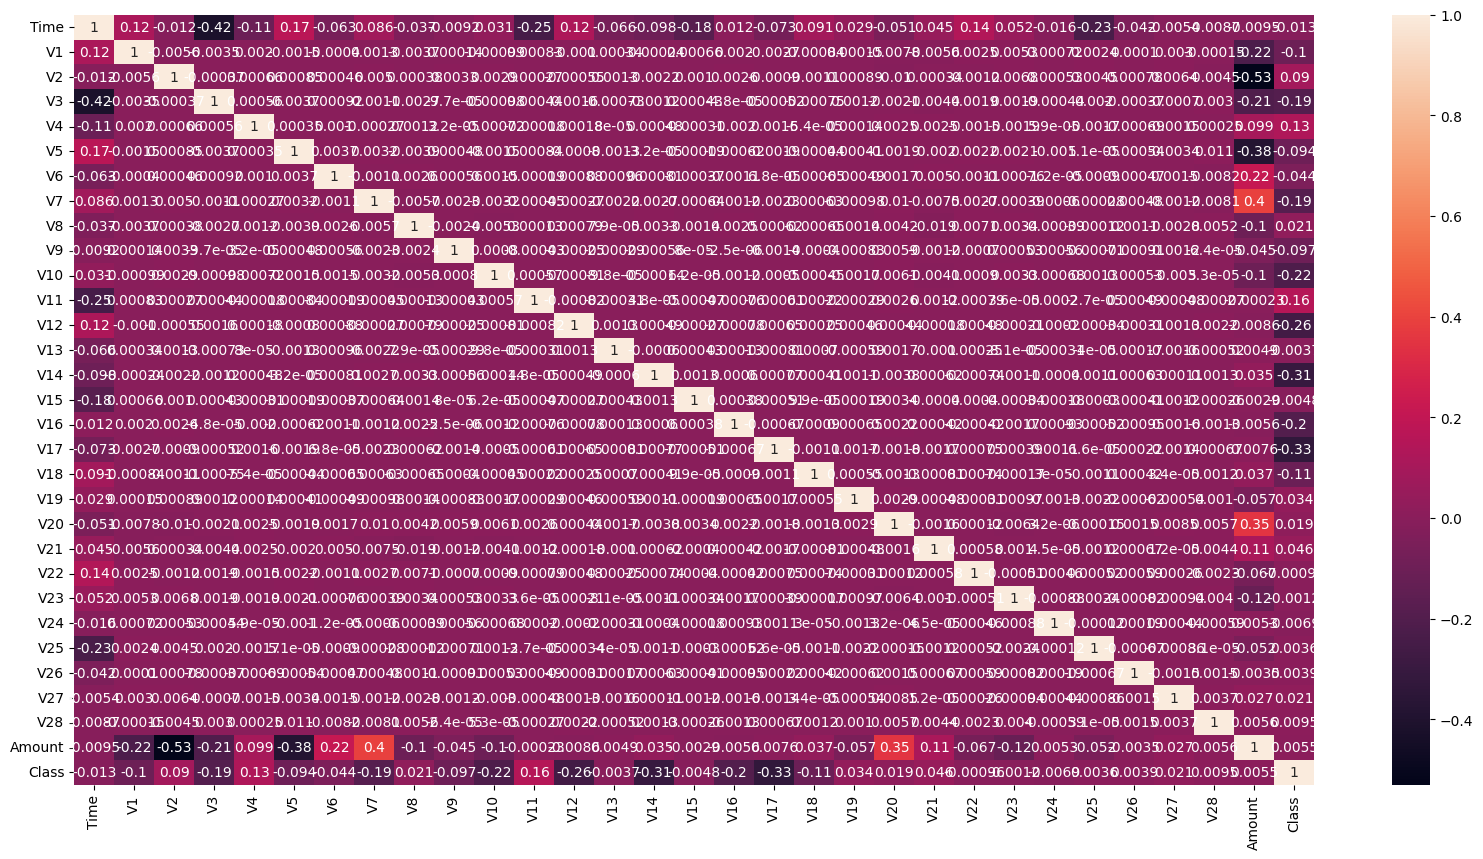

In [ ]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
Train_df = pd.concat([X_train,y_train], axis = 1)
sns.heatmap(Train_df.corr(),annot = True)

del Train_df

# Some columns, V17, V14, V12 and V11 have very negative correlations with Target, which means low value can correlate to Class 1


In [ ]:
#Plot precision recall curve
def plot_pr_curve(y_label, y_proba_pred):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve
    precision, recall, threshold = precision_recall_curve(y_label.values, y_proba_pred)
    no_skill = len(y_label[y_label == 1]) / len(y_label)
    plt.figure(figsize = (6,6))
    plt.title('precision-recall curve')
    plt.plot(recall, precision, 'b-', linewidth=2)
    plt.plot([0,1],[0,1],'r--')
    plt.plot([0,1],[no_skill, no_skill], linestyle = '--', label = 'No Skill')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([-0.01,1,0,1])
    plt.show()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

# Random Forest

In [ ]:
# Creating Training dataset for RandomForest

X_train1, X_test, y_train1, y_test = train_test_split(X_train,y_train,test_size = 0.30,random_state = 99)

In [ ]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt', class_weight = 'balanced')
rf.fit(X_train1,y_train1)
y_rf_pred = rf.predict(X_test)

metrics.confusion_matrix(y_true = y_test, y_pred = y_rf_pred)
print(classification_report(y_test,y_rf_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76776
           1       0.61      0.84      0.71       122

    accuracy                           1.00     76898
   macro avg       0.80      0.92      0.85     76898
weighted avg       1.00      1.00      1.00     76898



In [ ]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_rf_pred))

# precision
print("precision", metrics.precision_score(y_test, y_rf_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_rf_pred))

accuracy 0.9988946396525267
precision 0.6094674556213018
recall 0.8442622950819673


# Validation on Holdout data

In [ ]:
y_rf_pred1 = rf.predict(X_holdout)

metrics.confusion_matrix(y_true = y_holdout, y_pred = y_rf_pred1)
print(classification_report(y_holdout,y_rf_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.58      0.84      0.68        50

    accuracy                           1.00     28481
   macro avg       0.79      0.92      0.84     28481
weighted avg       1.00      1.00      1.00     28481



In [ ]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_holdout, y_rf_pred1))

# precision
print("precision", metrics.precision_score(y_holdout, y_rf_pred1))

# recall/sensitivity
print("recall", metrics.recall_score(y_holdout, y_rf_pred1))

accuracy 0.9986306660580738
precision 0.5753424657534246
recall 0.84


# Trying default Random forest without balanced parameter

In [ ]:
rf_default = RandomForestClassifier(n_estimators= 100, max_depth = 7, max_features='sqrt',)
rf_default.fit(X_train1,y_train1)
y_rf_pred_def = rf_default.predict(X_test)

metrics.confusion_matrix(y_true = y_test, y_pred = y_rf_pred)
print('TEST SET METRICS')
# print other metrics
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_rf_pred))
# precision
print("precision", metrics.precision_score(y_test, y_rf_pred))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_rf_pred))



print('\n HOLDOUT SET METRICS')
y_rf_pred1_def = rf_default.predict(X_holdout)
metrics.confusion_matrix(y_true = y_holdout, y_pred = y_rf_pred1_def)
# accuracy
print("accuracy", metrics.accuracy_score(y_holdout, y_rf_pred1_def))
# precision
print("precision", metrics.precision_score(y_holdout, y_rf_pred1_def))
# recall/sensitivity
print("recall", metrics.recall_score(y_holdout, y_rf_pred1_def))

TEST SET METRICS
accuracy 0.9988946396525267
precision 0.6094674556213018
recall 0.8442622950819673

 HOLDOUT SET METRICS
accuracy 0.9993328885923949
precision 0.8604651162790697
recall 0.74


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train1,y_train1)
y_pred_brf = brf.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_brf)
print('TEST SET METRICS')
# print other metrics
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_brf))
# precision
print("precision", metrics.precision_score(y_test, y_pred_brf))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_brf))



print('\n HOLDOUT SET METRICS')
y_brf_pred1 = brf.predict(X_holdout)
metrics.confusion_matrix(y_true = y_holdout, y_pred = y_brf_pred1)
# accuracy
print("accuracy", metrics.accuracy_score(y_holdout, y_brf_pred1))
# precision
print("precision", metrics.precision_score(y_holdout, y_brf_pred1))
# recall/sensitivity
print("recall", metrics.recall_score(y_holdout, y_brf_pred1))

TEST SET METRICS
accuracy 0.9795313272126713
precision 0.06474820143884892
recall 0.8852459016393442

 HOLDOUT SET METRICS
accuracy 0.9788279905902181
precision 0.07264296754250386
recall 0.94


# Trying XGBOOST

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train1,y_train1)
y_pred_xgb = xgb_model.predict(X_test)

metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_xgb)
print('TEST SET METRICS')
# print other metrics
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb))



print('\n HOLDOUT SET METRICS')
y_rf_pred1_xgb = xgb_model.predict(X_holdout)
metrics.confusion_matrix(y_true = y_holdout, y_pred = y_rf_pred1_xgb)
# accuracy
print("accuracy", metrics.accuracy_score(y_holdout, y_rf_pred1_xgb))
# precision
print("precision", metrics.precision_score(y_holdout, y_rf_pred1_xgb))
# recall/sensitivity
print("recall", metrics.recall_score(y_holdout, y_rf_pred1_xgb))


TEST SET METRICS
accuracy 0.9995708601003928
precision 0.9405940594059405
recall 0.7786885245901639

 HOLDOUT SET METRICS
accuracy 0.9993328885923949
precision 0.8604651162790697
recall 0.74


In [ ]:
metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_xgb)

array([[76770,     6],
       [   27,    95]])

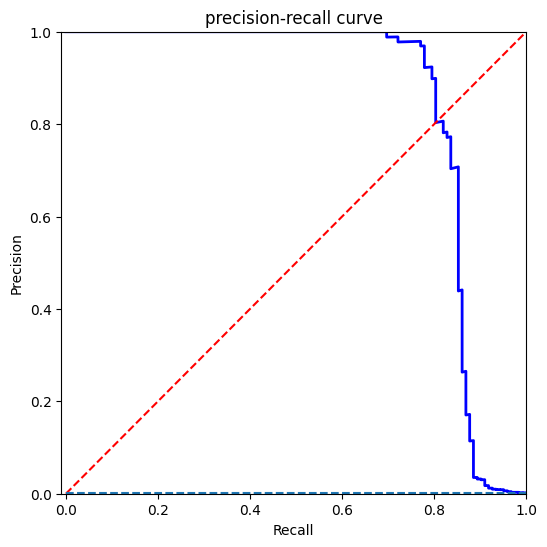

In [ ]:
plot_pr_curve(y_test,xgb_model.predict_proba(X_test)[:,1])

Text(0.5, 0, 'Relative Importance')

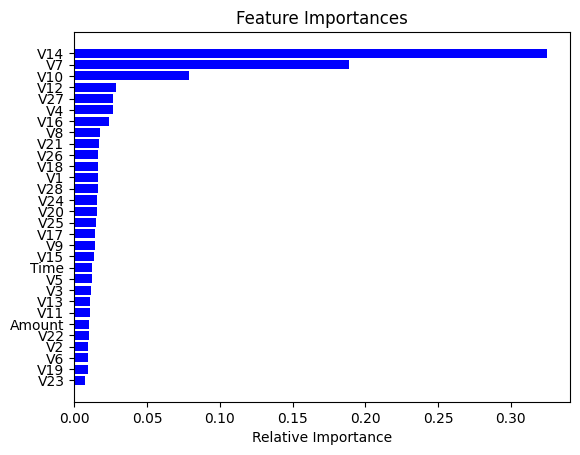

In [ ]:
features=X_train1.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Grid Search
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}

from sklearn.metrics import f1_score, make_scorer

gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,min_child_weight=2, gamma=0, subsample=0.8,
                                                      colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
                        param_grid = param_test2, scoring=make_scorer(f1_score),n_jobs=4, cv=5)
gsearch2.fit(X_train1,y_train1)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_child_weight': 4}, 0.8790726935221542)

In [ ]:
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'max_depth': 5, 'min_child_weight': 4}
0.8790726935221542


# After hyperparameter tuning

In [ ]:
xgb_model_hpTuned = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, gamma=0, subsample=0.8,
                                                      colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,max_depth = 5, min_child_weight = 4
                              )
xgb_model_hpTuned.fit(X_train1,y_train1)
y_pred_xgb_hp_tuned = xgb_model_hpTuned.predict(X_test)

metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_xgb_hp_tuned)
print('TEST SET METRICS')
# print other metrics
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb_hp_tuned))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb_hp_tuned))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb_hp_tuned))



print('\n HOLDOUT SET METRICS')
y_rf_pred1_xgb_hp_tuned = xgb_model_hpTuned.predict(X_holdout)
metrics.confusion_matrix(y_true = y_holdout, y_pred = y_rf_pred1_xgb_hp_tuned)
# accuracy
print("accuracy", metrics.accuracy_score(y_holdout, y_rf_pred1_xgb_hp_tuned))
# precision
print("precision", metrics.precision_score(y_holdout, y_rf_pred1_xgb_hp_tuned))
# recall/sensitivity
print("recall", metrics.recall_score(y_holdout, y_rf_pred1_xgb_hp_tuned))


TEST SET METRICS
accuracy 0.9996748940154491
precision 0.9568965517241379
recall 0.8473282442748091

 HOLDOUT SET METRICS
accuracy 0.9994382219725431
precision 0.8695652173913043
recall 0.8


In [ ]:
print(classification_report(y_test,y_pred_xgb_hp_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76776
           1       0.92      0.78      0.84       122

    accuracy                           1.00     76898
   macro avg       0.96      0.89      0.92     76898
weighted avg       1.00      1.00      1.00     76898



In [ ]:
metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_xgb_hp_tuned)

array([[76768,     8],
       [   27,    95]])

# Testing SMOTE TECHNIQUE

In [ ]:
# As we have ~450 Frauds in our non HOLDOUT data, we will use SMOTE upsampling upto 5000 Frauds and keep 10000 nonFrauds to maintain atleast 30:70 class 1:class 0 ratio

from imblearn.over_sampling import SMOTE

df_V2 = pd.concat([X_train,y_train], axis = 1)
fraud_v2 = df_V2[(df_V2.Class == 1)]
non_fraud_v2 = df_V2[(df_V2.Class == 0)].sample(1000)
non_fraud_v3 = df_V2[(df_V2.Class == 0)].sample(100000)

df_V3 = pd.concat([fraud_v2,non_fraud_v2], axis = 0)

X_smote = df_V3.drop('Class', axis=1)
y_smote = df_V3['Class']

smote = SMOTE(random_state = 42)
X_smote , y_smote = smote.fit_resample(X_smote,y_smote)

df_smote = pd.concat([X_smote,y_smote], axis = 1)
df_smote = pd.concat([df_smote,non_fraud_v3], axis = 0)

df_smote.Class.value_counts()

0    101000
1      1000
Name: Class, dtype: int64

In [ ]:
X_smote = df_smote.drop('Class', axis=1)
y_smote = df_smote['Class']

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote,test_size = 0.30,random_state = 99)

xgb_model_smote = xgb.XGBClassifier()
xgb_model_smote.fit(X_train_smote,y_train_smote)
y_pred_xgb_smote = xgb_model_smote.predict(X_test_smote)

metrics.confusion_matrix(y_true = y_test_smote, y_pred = y_pred_xgb_smote)
print('TEST SET METRICS')
# print other metrics
# accuracy
print("accuracy", metrics.accuracy_score(y_test_smote, y_pred_xgb_smote))
# precision
print("precision", metrics.precision_score(y_test_smote, y_pred_xgb_smote))
# recall/sensitivity
print("recall", metrics.recall_score(y_test_smote, y_pred_xgb_smote))



print('\n HOLDOUT SET METRICS')
y_rf_pred1_xgb_smote = xgb_model_smote.predict(X_holdout)
metrics.confusion_matrix(y_true = y_holdout, y_pred = y_rf_pred1_xgb_smote)
# accuracy
print("accuracy", metrics.accuracy_score(y_holdout, y_rf_pred1_xgb_smote))
# precision
print("precision", metrics.precision_score(y_holdout, y_rf_pred1_xgb_smote))
# recall/sensitivity
print("recall", metrics.recall_score(y_holdout, y_rf_pred1_xgb_smote))

TEST SET METRICS
accuracy 0.9987908496732026
precision 0.962457337883959
recall 0.9155844155844156

 HOLDOUT SET METRICS
accuracy 0.9993328885923949
precision 0.803921568627451
recall 0.82


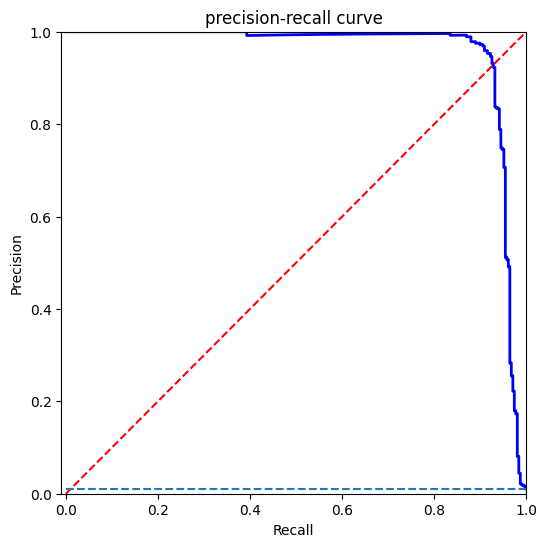

In [ ]:
plot_pr_curve(y_test_smote,xgb_model_smote.predict_proba(X_test_smote)[:,1])

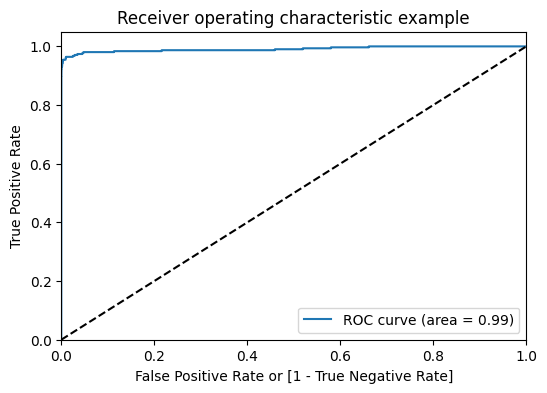

(array([0.        , 0.        , 0.        , ..., 0.99993398, 0.99996699,
        1.        ]),
 array([0.        , 0.00324675, 0.00649351, ..., 1.        , 1.        ,
        1.        ]),
 array([1.9999931e+00, 9.9999309e-01, 9.9999166e-01, ..., 9.3315933e-08,
        8.4521758e-08, 8.1877396e-08], dtype=float32))

In [ ]:
draw_roc(y_test_smote,xgb_model_smote.predict_proba(X_test_smote)[:,1])

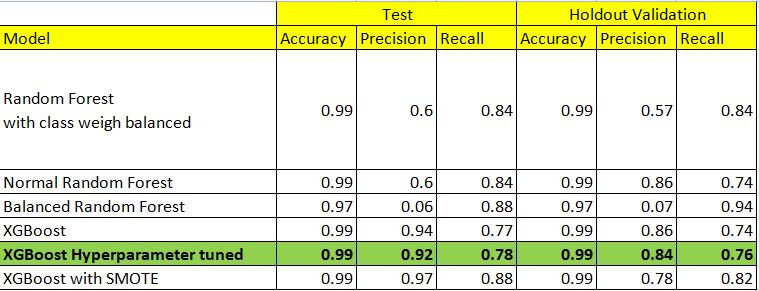

In [ ]:
# Based on stability of the model , we will go ahead with XGBoost hyperparameter tuned

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
  cm1 = metrics.confusion_matrix( y_test, xgb_model_hpTuned.predict_proba(X_test)[:,1] > i)
  total1=sum(sum(cm1))
  accuracy = (cm1[0,0]+cm1[1,1])/total1
  precision = metrics.precision_score(y_test, xgb_model_hpTuned.predict_proba(X_test)[:,1] > i)
  recall = metrics.recall_score(y_test, xgb_model_hpTuned.predict_proba(X_test)[:,1] > i)
  cutoff_df.loc[i] =[ i ,accuracy,precision,recall]

print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.001704   0.001704  1.000000
0.1   0.1  0.999506   0.849624  0.862595
0.2   0.2  0.999610   0.904000  0.862595
0.3   0.3  0.999675   0.949153  0.854962
0.4   0.4  0.999675   0.956897  0.847328
0.5   0.5  0.999675   0.956897  0.847328
0.6   0.6  0.999688   0.981982  0.832061
0.7   0.7  0.999662   0.990654  0.809160
0.8   0.8  0.999636   1.000000  0.786260
0.9   0.9  0.999558   1.000000  0.740458


<Axes: xlabel='prob'>

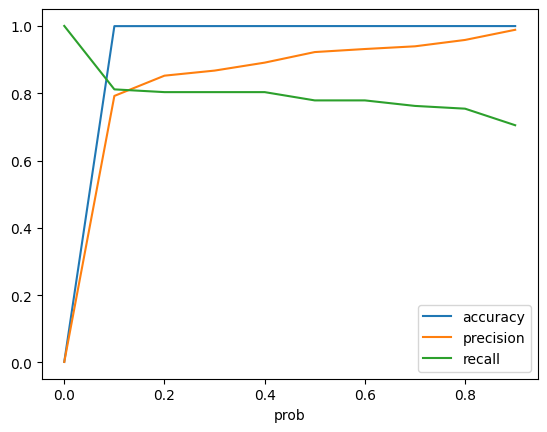

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])

In [ ]:
# Could be 0.17 is the ideal cutoff
# On Test data
print(classification_report(y_test,xgb_model_hpTuned.predict_proba(X_test)[:,1] > 0.1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76776
           1       0.79      0.81      0.80       122

    accuracy                           1.00     76898
   macro avg       0.90      0.91      0.90     76898
weighted avg       1.00      1.00      1.00     76898



In [ ]:
# On holdout data
print(classification_report(y_holdout,xgb_model_hpTuned.predict_proba(X_holdout)[:,1] > 0.1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.77      0.82      0.80        50

    accuracy                           1.00     28481
   macro avg       0.89      0.91      0.90     28481
weighted avg       1.00      1.00      1.00     28481



# As we do not want to raise lot of false Alerts, we will keep our precision high by compromising a bit on Recall.
### So we will keep the threshold of 0.5 as default


In [ ]:
import pickle

In [ ]:
# saving the best model (model.pk1)

pickle.dump(xgb_model_hpTuned , open('/content/drive/MyDrive/Temporary/model.pk1' , 'wb'))

In [ ]:
# Reading the model file

loaded_model = pickle.load(open('/content/drive/MyDrive/Temporary/model.pk1' , 'rb'))

In [ ]:
# Using the loaded model to predict evaluation

loaded_model_accuracy = loaded_model.score(x_test, y_test)

print("Loaded Model Accuracy:" , loaded_model_accuracy * 100 , "%")

# END